#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

###Импорт библиотек

In [47]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout,Flatten, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

from tensorflow.keras.datasets import fashion_mnist


# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

from keras.regularizers import l2

from keras.optimizers import RMSprop

# импорт библиотеки
from sklearn.model_selection import train_test_split

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

## Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

#### Выбран кодовый формат

Вывод примеров

In [48]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


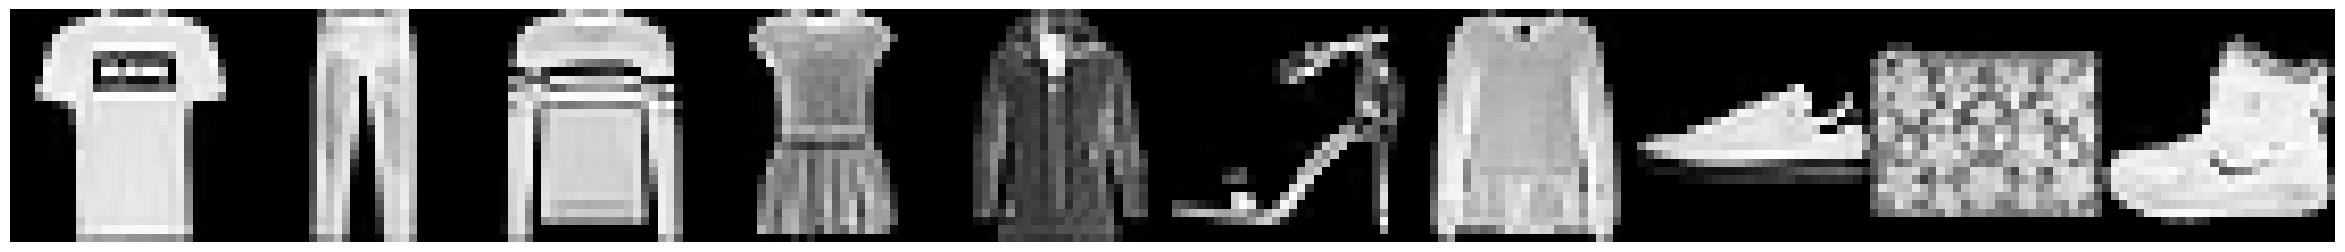

In [49]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

# Мое решение

In [50]:
# создание словаря для запоминания результатов
accuracyDict = dict()

In [51]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print(f'Форма обучающих данных: {x_train.shape}')
print(f'Форма  тестовых данных: {x_test.shape}')

Форма обучающих данных: (60000, 784)
Форма  тестовых данных: (10000, 784)


In [52]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [53]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 1 модель

In [54]:
# Создание модели
model = Sequential()

model.add(Dense(400, input_dim=784, activation='relu'))
model.add(Dropout(0.5))  # Добавляем Dropout для регуляризации
model.add(Dense(200, activation='relu'))  # Уменьшаем количество нейронов
model.add(Dropout(0.5))  # Добавляем Dropout для регуляризации
model.add(Dense(10, activation='softmax'))

In [55]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [56]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.7132 - accuracy: 0.7432 - val_loss: 0.4438 - val_accuracy: 0.8390
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4960 - accuracy: 0.8233 - val_loss: 0.4002 - val_accuracy: 0.8509
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4512 - accuracy: 0.8379 - val_loss: 0.3807 - val_accuracy: 0.8571
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4248 - accuracy: 0.8458 - val_loss: 0.3720 - val_accuracy: 0.8623
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4099 - accuracy: 0.8529 - val_loss: 0.3803 - val_accuracy: 0.8591
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3919 - accuracy: 0.8573 - val_loss: 0.3483 - val_accuracy: 0.8749
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3840 - accuracy: 0.8604 - val_loss: 0.3457 - val_accuracy: 0.8765
Epoch 

В задании было указано, что обучающая выборка составляет 50000 примеров, проверочная выборка - 10000 примеров, а тестовая выборка также составляет 10000 примеров. При использовании validation_split=0.2 при обучении модели 20% от обучающей выборки будут отложены как проверочная выборка, что соответствует требованиям.

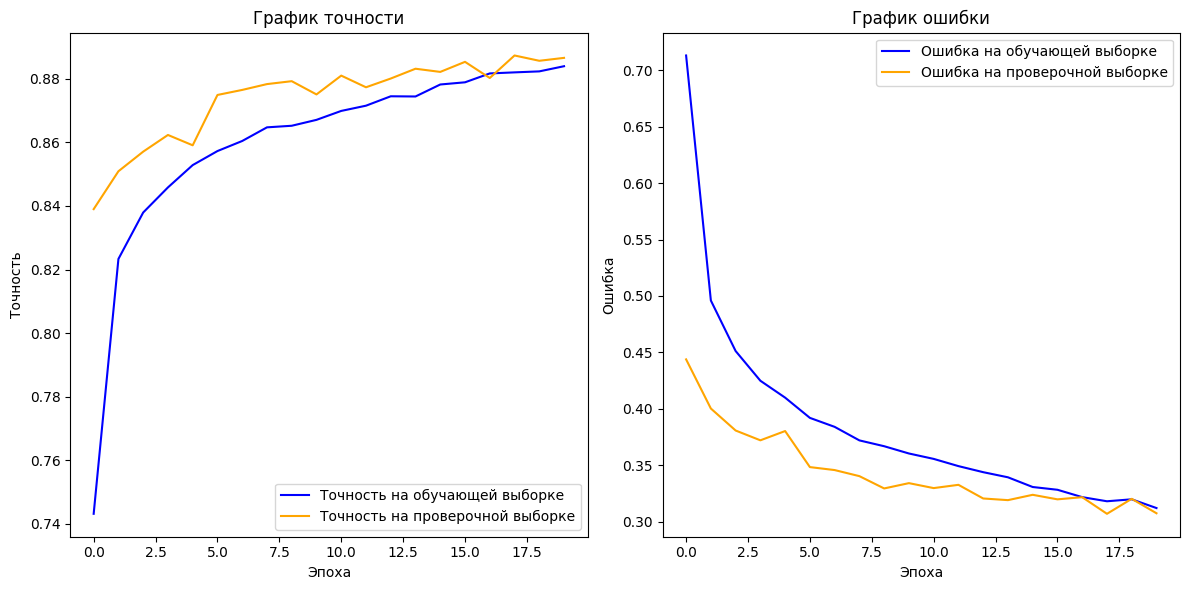

In [57]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

In [58]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 83.9%
Эпоха:  1 точность: 85.1%
Эпоха:  2 точность: 85.7%
Эпоха:  3 точность: 86.2%
Эпоха:  4 точность: 85.9%


In [59]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8772
Model 1 - Test Accuracy: 0.8772000074386597


In [60]:
accuracyDict['model_1'] = accuracy

## 2 модель

In [61]:
model = Sequential([
    Dense(400, input_dim=784, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(200, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(10, activation='softmax')
])

In [62]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [63]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.7170 - accuracy: 0.7445 - val_loss: 0.4462 - val_accuracy: 0.8382
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4908 - accuracy: 0.8223 - val_loss: 0.4063 - val_accuracy: 0.8524
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4509 - accuracy: 0.8386 - val_loss: 0.3850 - val_accuracy: 0.8573
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4274 - accuracy: 0.8439 - val_loss: 0.3687 - val_accuracy: 0.8636
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4077 - accuracy: 0.8522 - val_loss: 0.3609 - val_accuracy: 0.8627
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3963 - accuracy: 0.8568 - val_loss: 0.3461 - val_accuracy: 0.8708
Epoch 7/20
375/375 [==============================] - 2s 7ms/step - loss: 0.3812 - accuracy: 0.8593 - val_loss: 0.3371 - val_accuracy: 0.8777
Epoch 

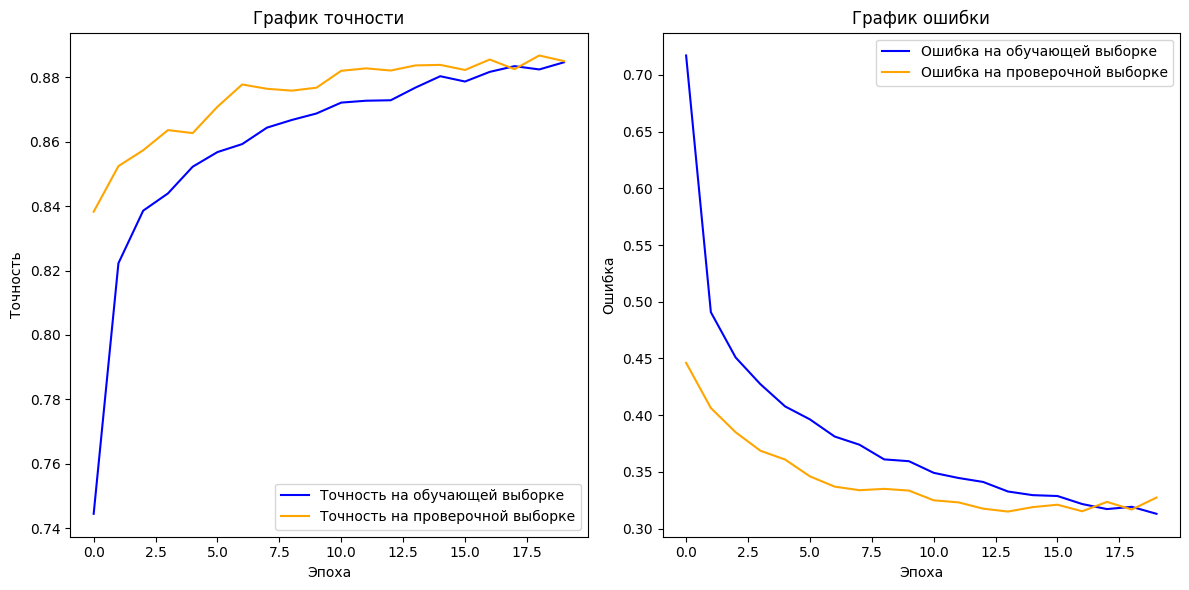

In [64]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

In [65]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 83.8%
Эпоха:  1 точность: 85.2%
Эпоха:  2 точность: 85.7%
Эпоха:  3 точность: 86.4%
Эпоха:  4 точность: 86.3%


In [66]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 2 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8784
Model 2 - Test Accuracy: 0.8784000277519226


In [67]:
accuracyDict['model_2'] = accuracy

## 3 модель

In [68]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

In [69]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [70]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 1.0602 - accuracy: 0.5632 - val_loss: 0.2491 - val_accuracy: 0.6535
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2371 - accuracy: 0.6453 - val_loss: 0.2273 - val_accuracy: 0.6641
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2207 - accuracy: 0.6865 - val_loss: 0.2126 - val_accuracy: 0.7190
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2091 - accuracy: 0.7142 - val_loss: 0.2091 - val_accuracy: 0.6997
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2013 - accuracy: 0.7252 - val_loss: 0.1948 - val_accuracy: 0.7348
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1947 - accuracy: 0.7349 - val_loss: 0.1918 - val_accuracy: 0.7345
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1899 - accuracy: 0.7397 - val_loss: 0.1892 - val_accuracy: 0.7287
Epoch 

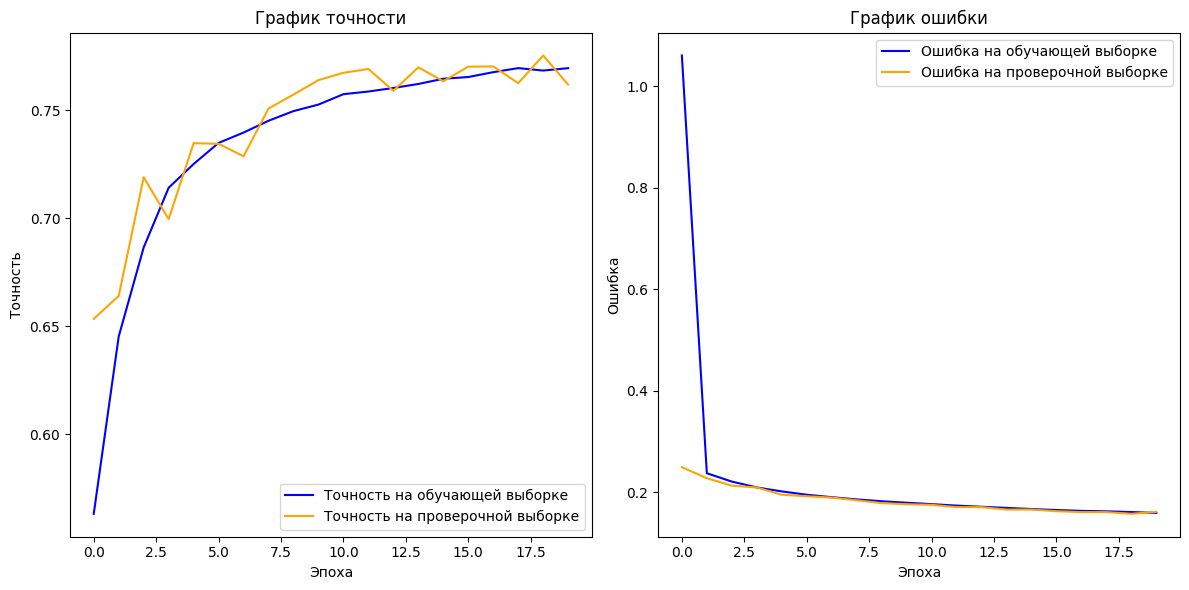

In [71]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


In [72]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 65.4%
Эпоха:  1 точность: 66.4%
Эпоха:  2 точность: 71.9%
Эпоха:  3 точность: 70.0%
Эпоха:  4 точность: 73.5%


In [73]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 3 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1627 - accuracy: 0.7601
Model 3 - Test Accuracy: 0.7601000070571899


In [74]:
accuracyDict['model_3'] = accuracy

## 4 модель

In [75]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.3),  # Добавление слоя Dropout с коэффициентом отсева 0.3
    Dense(256, activation='relu'),
    Dropout(0.3),  # Добавление слоя Dropout с коэффициентом отсева 0.3
    Dense(128, activation='relu'),
    Dropout(0.3),  # Добавление слоя Dropout с коэффициентом отсева 0.3
    Dense(10, activation='softmax')
])

In [76]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [77]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 5s 8ms/step - loss: 0.1296 - accuracy: 0.7397 - val_loss: 0.0750 - val_accuracy: 0.8461
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0802 - accuracy: 0.8415 - val_loss: 0.0682 - val_accuracy: 0.8601
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0718 - accuracy: 0.8579 - val_loss: 0.0650 - val_accuracy: 0.8683
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0679 - accuracy: 0.8632 - val_loss: 0.0619 - val_accuracy: 0.8716
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0641 - accuracy: 0.8714 - val_loss: 0.0603 - val_accuracy: 0.8775
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0608 - accuracy: 0.8778 - val_loss: 0.0589 - val_accuracy: 0.8818
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0601 - accuracy: 0.8804 - val_loss: 0.0586 - val_accuracy: 0.8816
Epoch 

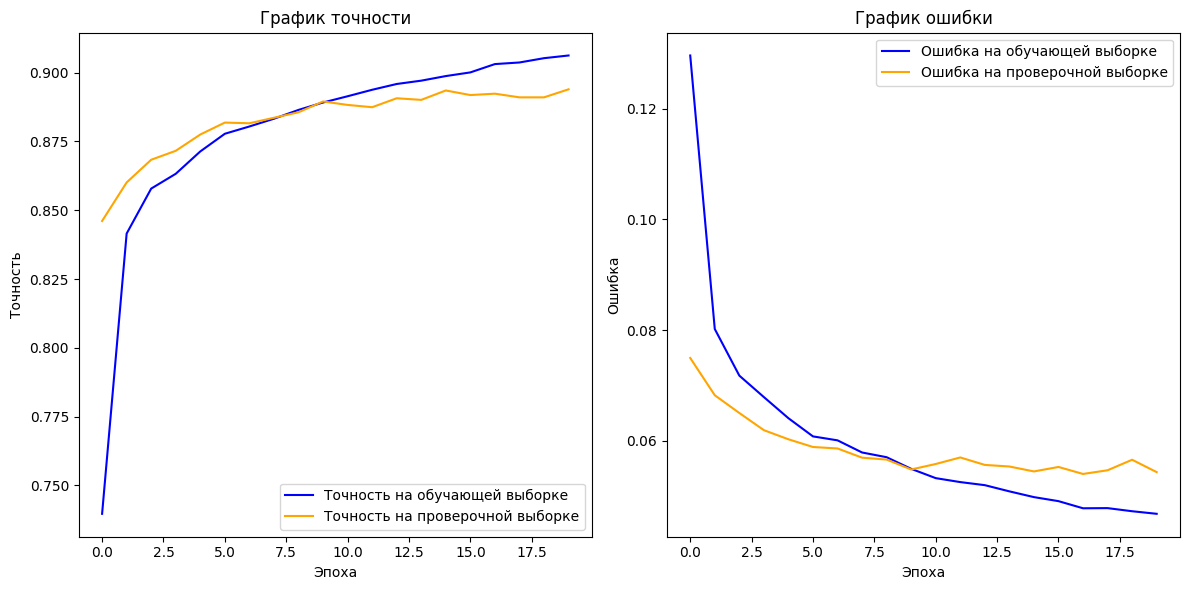

In [78]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


In [79]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 84.6%
Эпоха:  1 точность: 86.0%
Эпоха:  2 точность: 86.8%
Эпоха:  3 точность: 87.2%
Эпоха:  4 точность: 87.7%


In [80]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 4 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.8871
Model 4 - Test Accuracy: 0.8870999813079834


In [81]:
accuracyDict['model_4'] = accuracy

## 5 модель

In [82]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    BatchNormalization(),  # Добавление слоя BatchNormalization
    Dense(256, activation='sigmoid'),  # Изменение функции активации на sigmoid
    BatchNormalization(),  # Добавление слоя BatchNormalization
    Dense(128, activation='relu'),
    BatchNormalization(),  # Добавление слоя BatchNormalization
    Dense(10, activation='softmax')
])

In [83]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [84]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 6s 8ms/step - loss: 0.1809 - accuracy: 0.8360 - val_loss: 0.0874 - val_accuracy: 0.8362
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0673 - accuracy: 0.8706 - val_loss: 0.0695 - val_accuracy: 0.8665
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0610 - accuracy: 0.8788 - val_loss: 0.0679 - val_accuracy: 0.8633
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0583 - accuracy: 0.8835 - val_loss: 0.0685 - val_accuracy: 0.8614
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0553 - accuracy: 0.8889 - val_loss: 0.0714 - val_accuracy: 0.8577
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0530 - accuracy: 0.8948 - val_loss: 0.0825 - val_accuracy: 0.8459
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0498 - accuracy: 0.8989 - val_loss: 0.0729 - val_accuracy: 0.8544
Epoch 

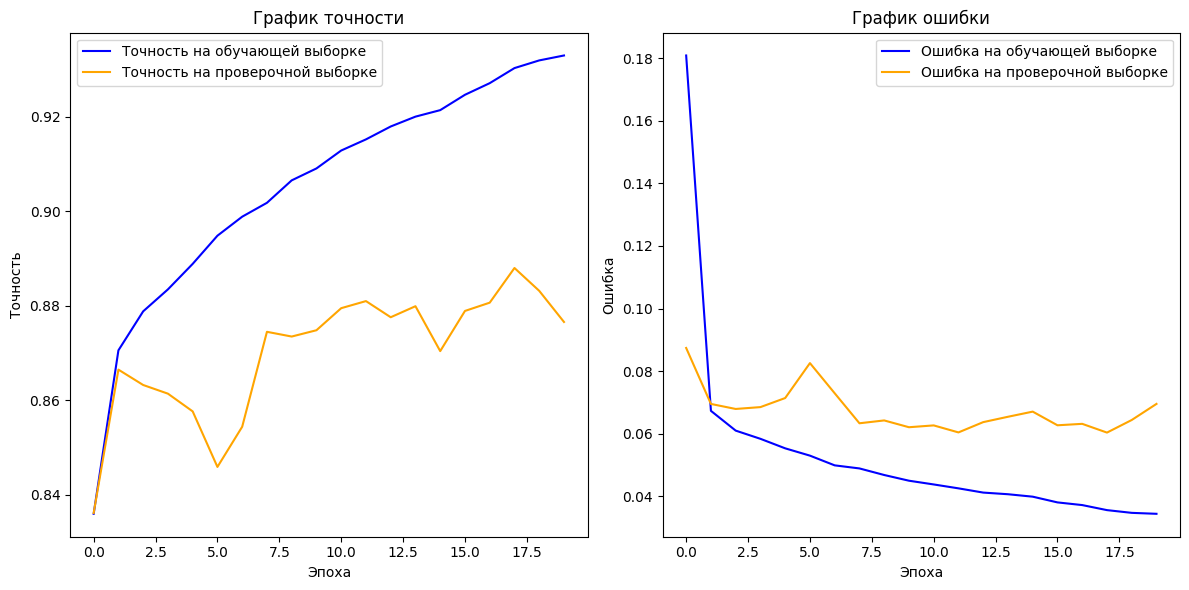

In [85]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


In [86]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 83.6%
Эпоха:  1 точность: 86.7%
Эпоха:  2 точность: 86.3%
Эпоха:  3 точность: 86.1%
Эпоха:  4 точность: 85.8%


In [87]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 5 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.8701
Model 5 - Test Accuracy: 0.8701000213623047


In [88]:
accuracyDict['model_5'] = accuracy

## 6 модель

In [89]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [90]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [91]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

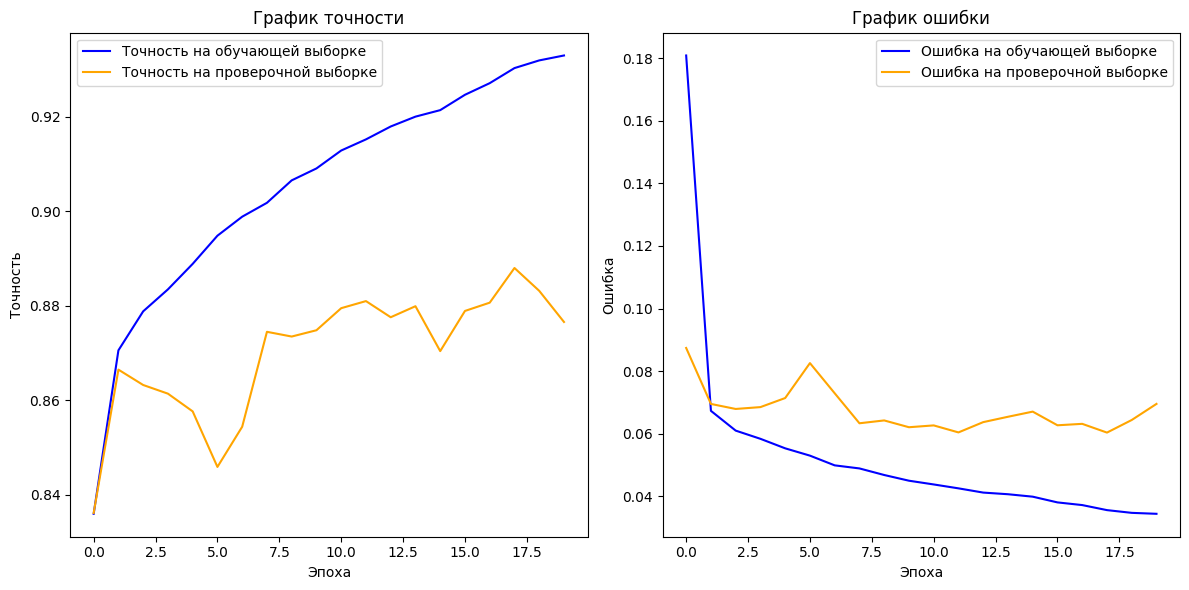

In [92]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

In [93]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 83.6%
Эпоха:  1 точность: 86.7%
Эпоха:  2 точность: 86.3%
Эпоха:  3 точность: 86.1%
Эпоха:  4 точность: 85.8%


In [94]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 6 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6968 - accuracy: 0.0759
Model 6 - Test Accuracy: 0.07590000331401825


In [95]:
accuracyDict['model_6'] = accuracy

## 7 модель

In [96]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(512, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(256, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавляем слой Dropout
    Dense(10, activation='softmax')
])

In [97]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [98]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.9819 - accuracy: 0.6390 - val_loss: 0.5186 - val_accuracy: 0.8087
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.5987 - accuracy: 0.7916 - val_loss: 0.4705 - val_accuracy: 0.8292
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5383 - accuracy: 0.8129 - val_loss: 0.4175 - val_accuracy: 0.8438
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4992 - accuracy: 0.8277 - val_loss: 0.3949 - val_accuracy: 0.8572
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4808 - accuracy: 0.8310 - val_loss: 0.3858 - val_accuracy: 0.8595
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4698 - accuracy: 0.8362 - val_loss: 0.3854 - val_accuracy: 0.8562
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4498 - accuracy: 0.8423 - val_loss: 0.3833 - val_accuracy: 0.8637
Epoch 

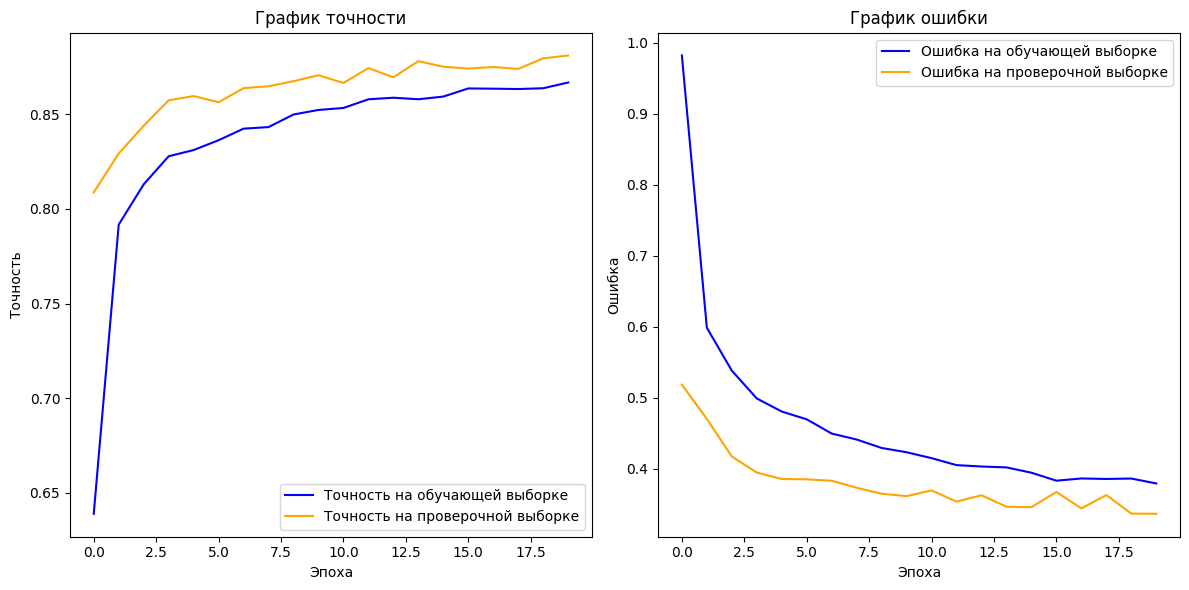

In [99]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

In [100]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 80.9%
Эпоха:  1 точность: 82.9%
Эпоха:  2 точность: 84.4%
Эпоха:  3 точность: 85.7%
Эпоха:  4 точность: 85.9%


In [101]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 7 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8742
Model 7 - Test Accuracy: 0.8741999864578247


In [102]:
accuracyDict['model_7'] = accuracy

## 8 модель

In [103]:
model = Sequential([
    Dense(1024, input_dim=784, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [104]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [105]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.1353 - accuracy: 0.7252 - val_loss: 0.0803 - val_accuracy: 0.8351
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0874 - accuracy: 0.8262 - val_loss: 0.0714 - val_accuracy: 0.8531
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0791 - accuracy: 0.8391 - val_loss: 0.0680 - val_accuracy: 0.8596
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0755 - accuracy: 0.8489 - val_loss: 0.0653 - val_accuracy: 0.8639
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0729 - accuracy: 0.8547 - val_loss: 0.0653 - val_accuracy: 0.8680
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.8583 - val_loss: 0.0626 - val_accuracy: 0.8687
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0674 - accuracy: 0.8636 - val_loss: 0.0611 - val_accuracy: 0.8753
Epoch 

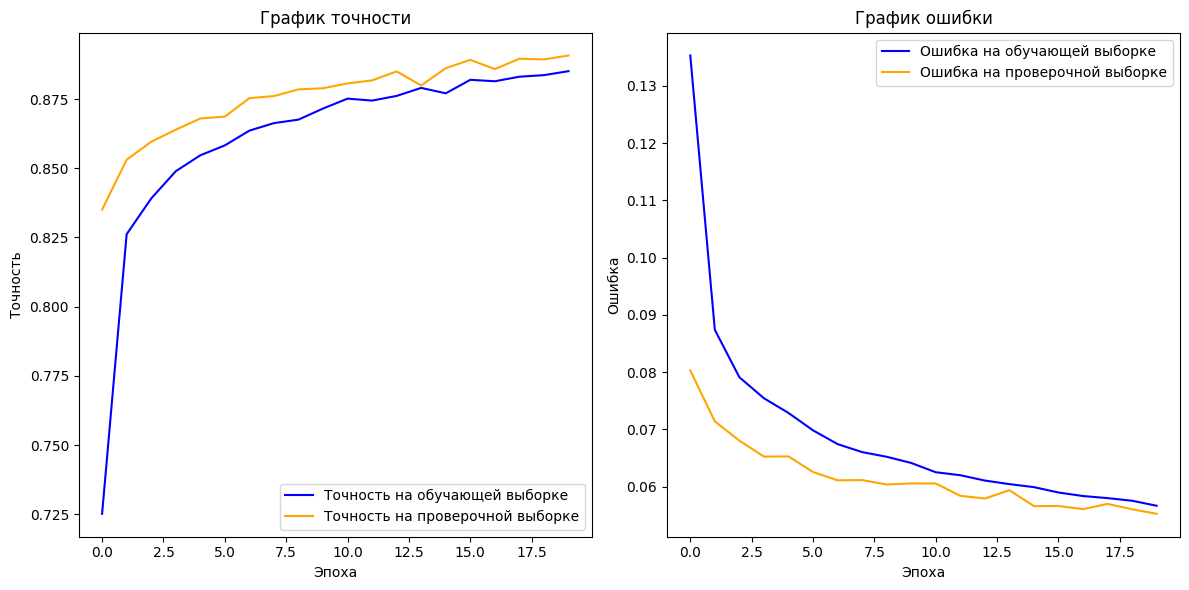

In [106]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


In [107]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 83.5%
Эпоха:  1 точность: 85.3%
Эпоха:  2 точность: 86.0%
Эпоха:  3 точность: 86.4%
Эпоха:  4 точность: 86.8%


In [108]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 8 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.8802
Model 8 - Test Accuracy: 0.8802000284194946


In [109]:
accuracyDict['model_8'] = accuracy

## 9 модель

In [110]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(256, activation='sigmoid', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

In [111]:
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [112]:
# Обучение модели
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 1.0926 - accuracy: 0.2065 - val_loss: 0.3140 - val_accuracy: 0.2272
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3087 - accuracy: 0.2309 - val_loss: 0.3036 - val_accuracy: 0.2496
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3018 - accuracy: 0.2484 - val_loss: 0.2993 - val_accuracy: 0.2792
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2979 - accuracy: 0.2614 - val_loss: 0.2952 - val_accuracy: 0.2998
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2953 - accuracy: 0.2757 - val_loss: 0.2928 - val_accuracy: 0.3362
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2930 - accuracy: 0.2912 - val_loss: 0.2922 - val_accuracy: 0.3283
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2914 - accuracy: 0.3006 - val_loss: 0.2925 - val_accuracy: 0.2836
Epoch 

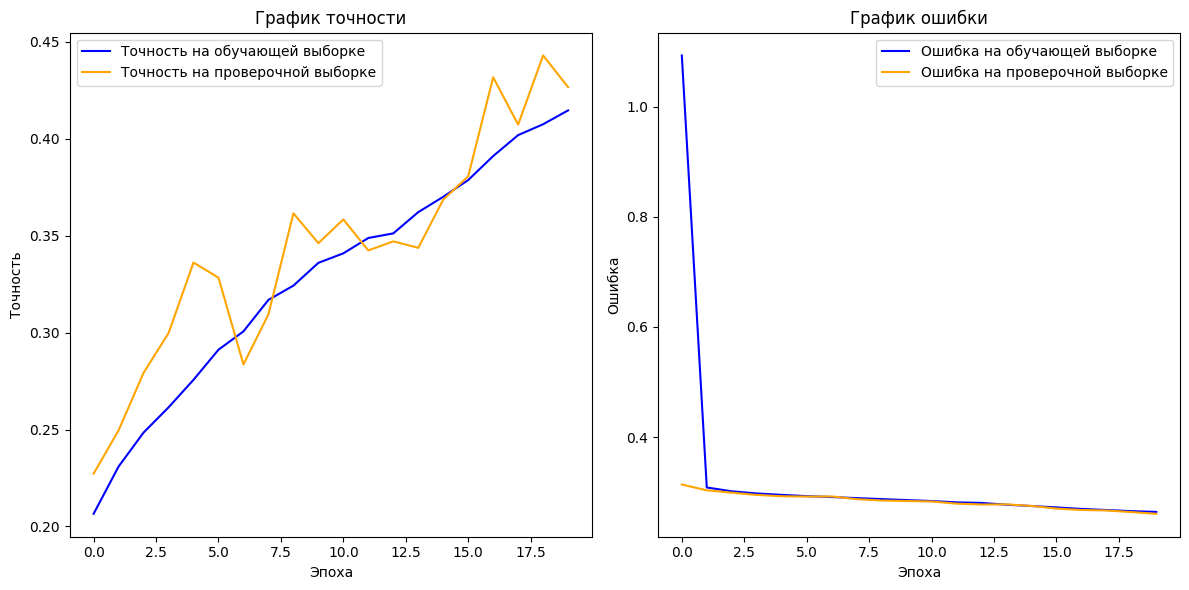

In [113]:
# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График точности
axes[0].plot(history.history['accuracy'], label='Точность на обучающей выборке', color='blue')
axes[0].plot(history.history['val_accuracy'], label='Точность на проверочной выборке', color='orange')
axes[0].set_title('График точности')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Точность')
axes[0].legend()

# График ошибки
axes[1].plot(history.history['loss'], label='Ошибка на обучающей выборке', color='blue')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочной выборке', color='orange')
axes[1].set_title('График ошибки')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

# Показать графики
plt.tight_layout()
plt.show()


In [114]:
# Вывод значения точности распознавания на проверочной выборке по эпохам

val_acc = history.history['val_accuracy']

for i in range(5):
    # .format() - метод форматирования данных при выводе
    print('Эпоха: {:2} точность: {:5.1%}'.format(i, val_acc[i]))

Эпоха:  0 точность: 22.7%
Эпоха:  1 точность: 25.0%
Эпоха:  2 точность: 27.9%
Эпоха:  3 точность: 30.0%
Эпоха:  4 точность: 33.6%


In [115]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 9 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.4194
Model 9 - Test Accuracy: 0.41940000653266907


In [116]:
accuracyDict['model_9'] = accuracy

## сравнительный график

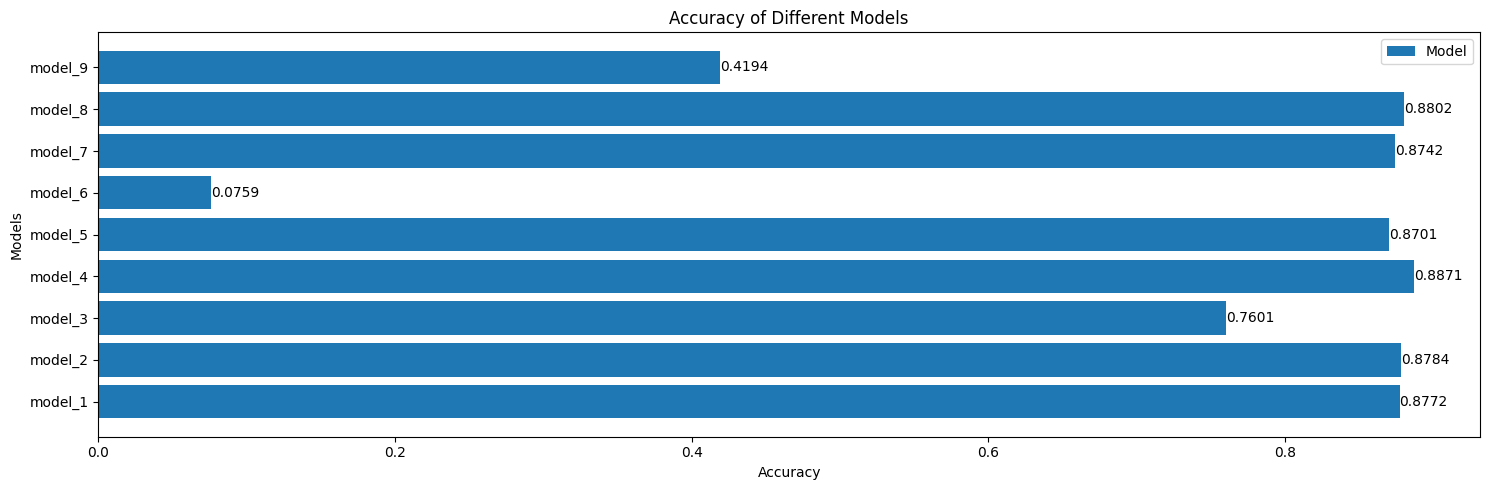

In [117]:
labels = list(accuracyDict.keys())
values = list(accuracyDict.values())

# Создание графика
plt.figure(figsize=(15, 5))

# Построение столбцовдля accuracy_lin
bars = plt.barh(labels, values, label='Model')


# Добавление подписей осей и заголовка
plt.xlabel('Accuracy')  # изменена подпись оси x
plt.ylabel('Models')  # изменена подпись оси y
plt.title('Accuracy of Different Models')

# Добавление горизонтальных линий для обозначения уровней
#for level in values:
#    plt.axvline(x=level, color='gray', linestyle='--', linewidth=0.5)

# Добавление легенды
plt.legend()

# Добавление засечек для каждого столбца
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center')

# Отображение графика
plt.tight_layout()
plt.show()